In [2]:
import pandas as pd
import numpy as np
import fit_curves 
import warnings
from plotnine.exceptions import PlotnineWarning
from fit_curves import *

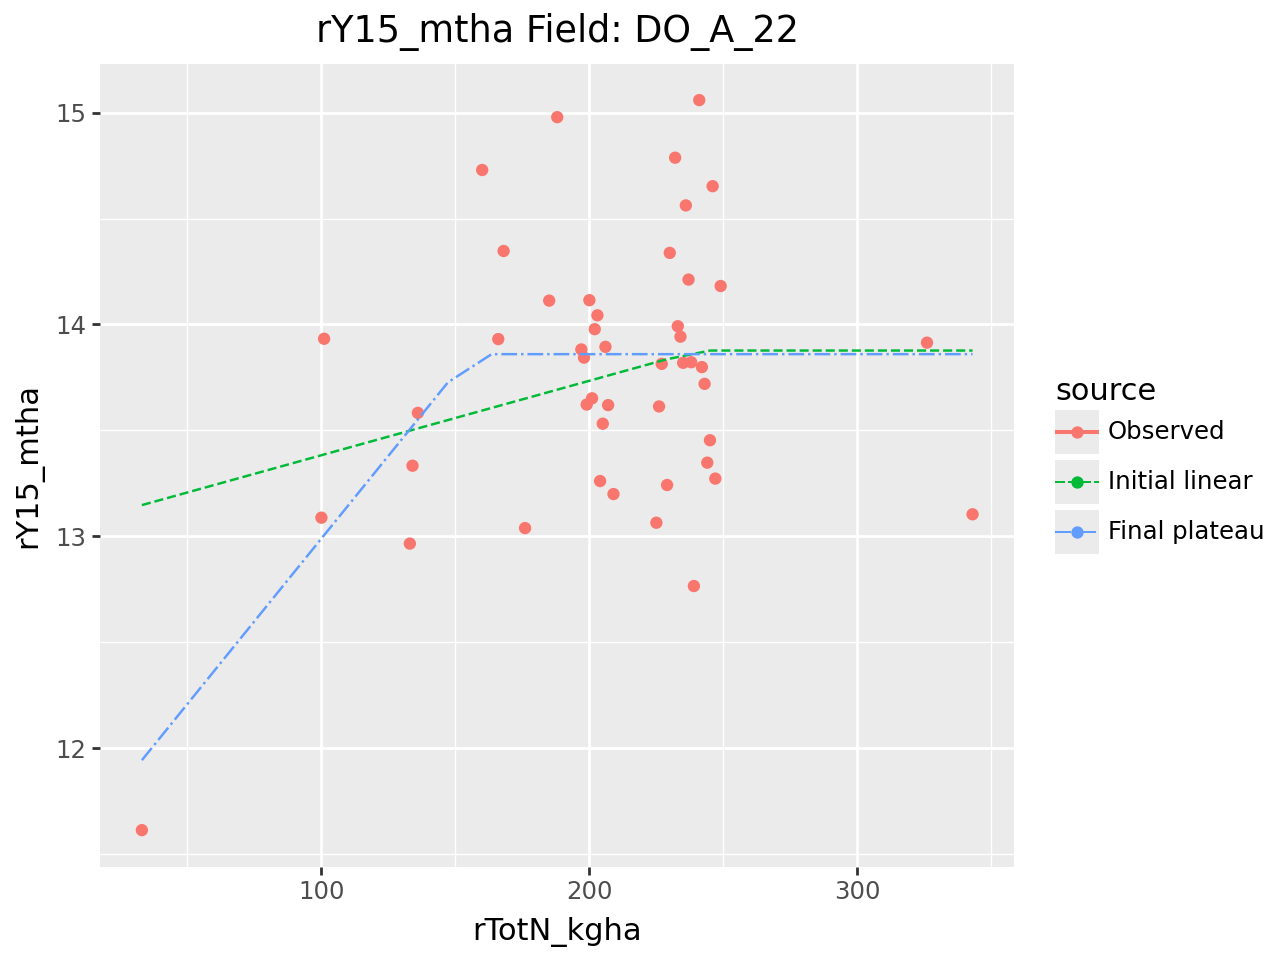

{'b0': np.float64(11.428213636278482), 'b1': np.float64(0.015614199601593633), 'x_break': np.float64(155.72789558151592), 'y_plateau': np.float64(13.859780081424402), 'r2': np.float64(0.27906731034168253), 'rmse': np.float64(0.526164323939386), 'aic': np.float64(-54.361320937914314)}


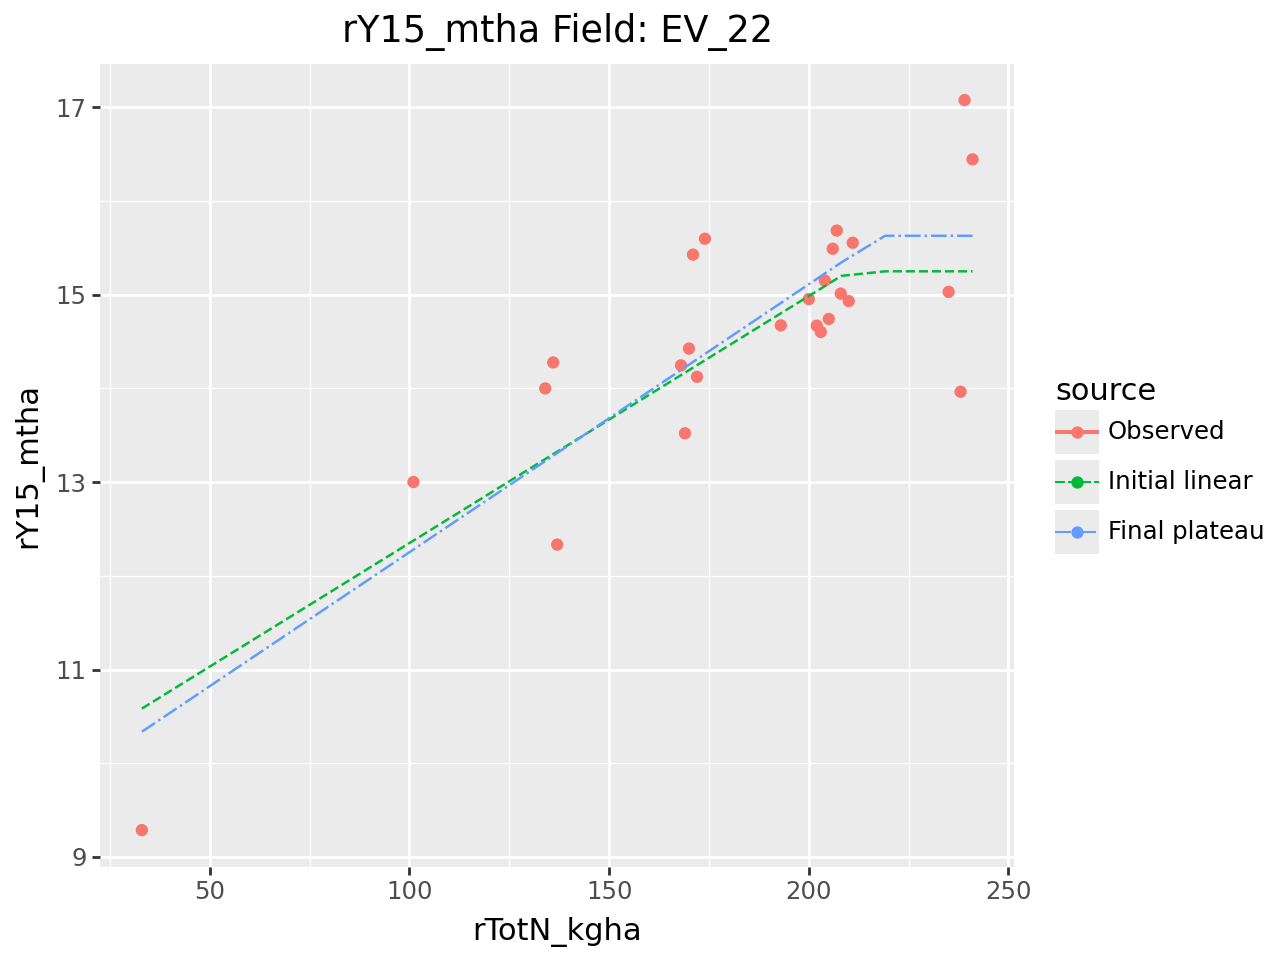

{'b0': np.float64(9.392265791486539), 'b1': np.float64(0.028599860707170754), 'x_break': np.float64(218.0831224823642), 'y_plateau': np.float64(15.629412717067012), 'r2': np.float64(0.720051154475754), 'rmse': np.float64(0.7576332903288514), 'aic': np.float64(-8.432901404882331)}


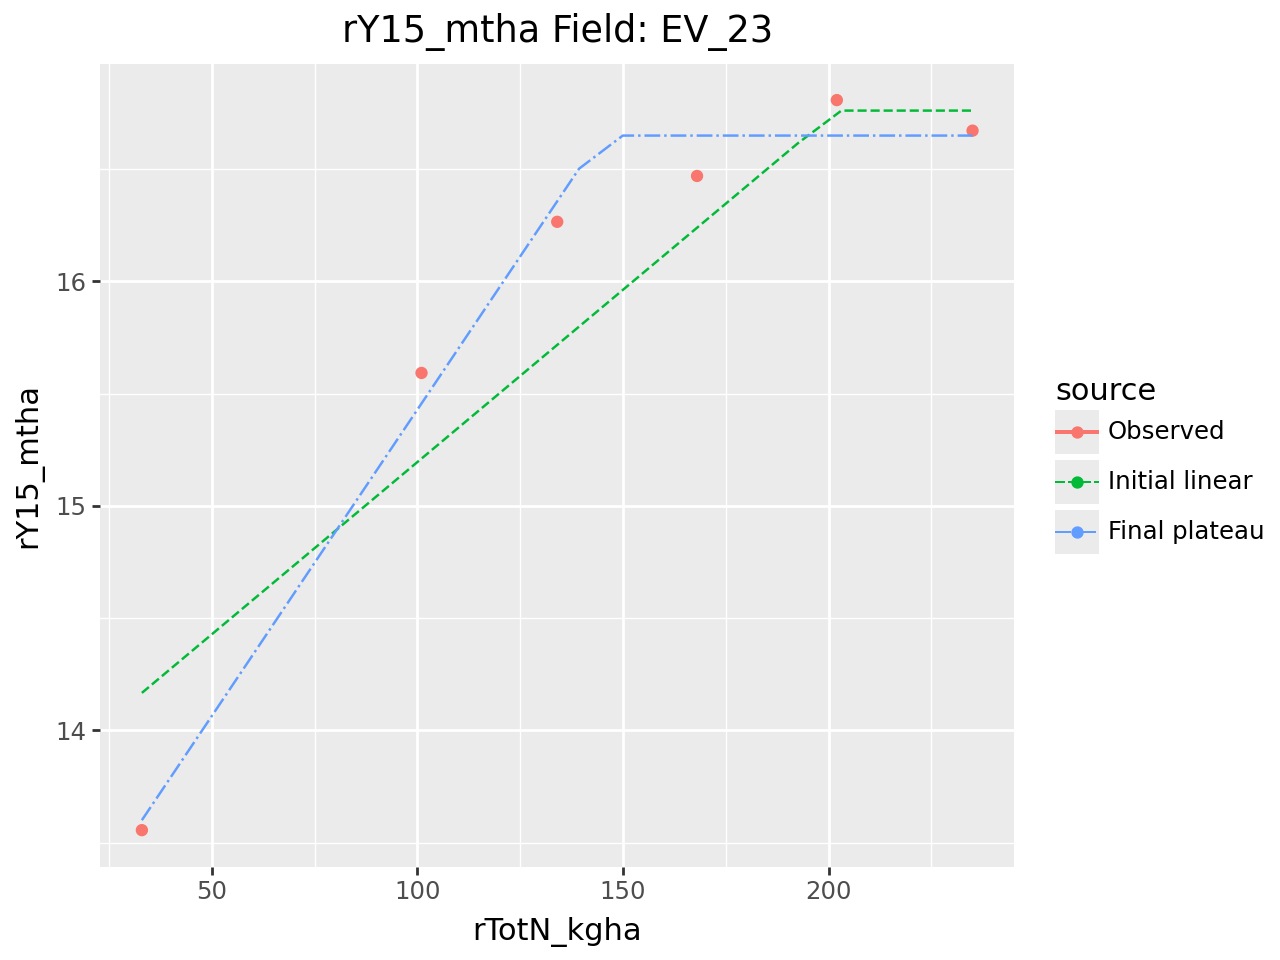

{'b0': np.float64(12.700115505843462), 'b1': np.float64(0.027288687381369952), 'x_break': np.float64(144.7197178677736), 'y_plateau': np.float64(16.649326644657194), 'r2': np.float64(0.9883933379060164), 'rmse': np.float64(0.12015673131810697), 'aic': np.float64(-19.42749952898114)}


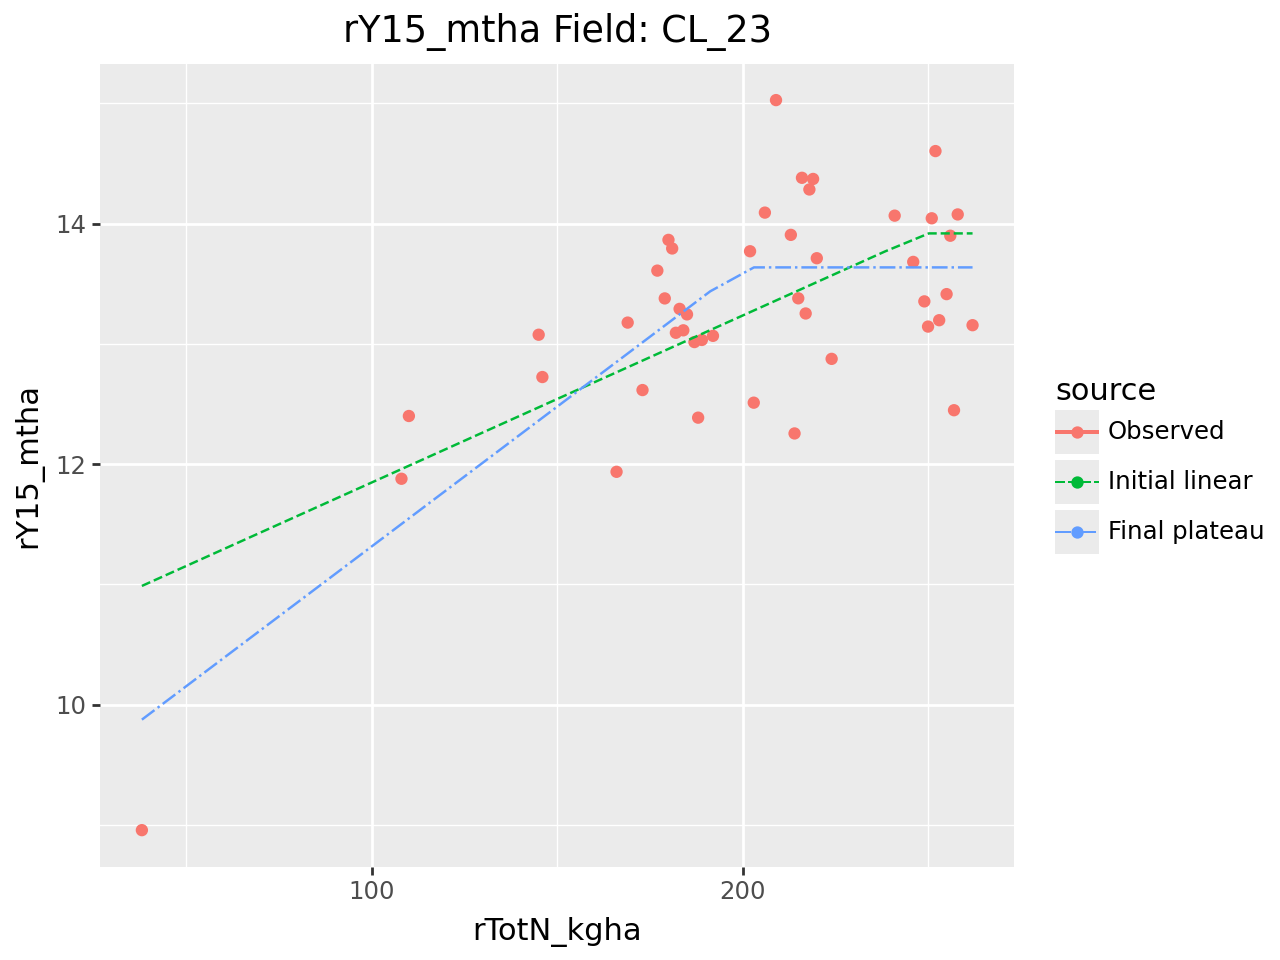

{'b0': np.float64(8.991877059899652), 'b1': np.float64(0.023240884344505126), 'x_break': np.float64(199.82146620207254), 'y_plateau': np.float64(13.635904645451461), 'r2': np.float64(0.5700600701097585), 'rmse': np.float64(0.6215054874165272), 'aic': np.float64(-36.804948488379)}


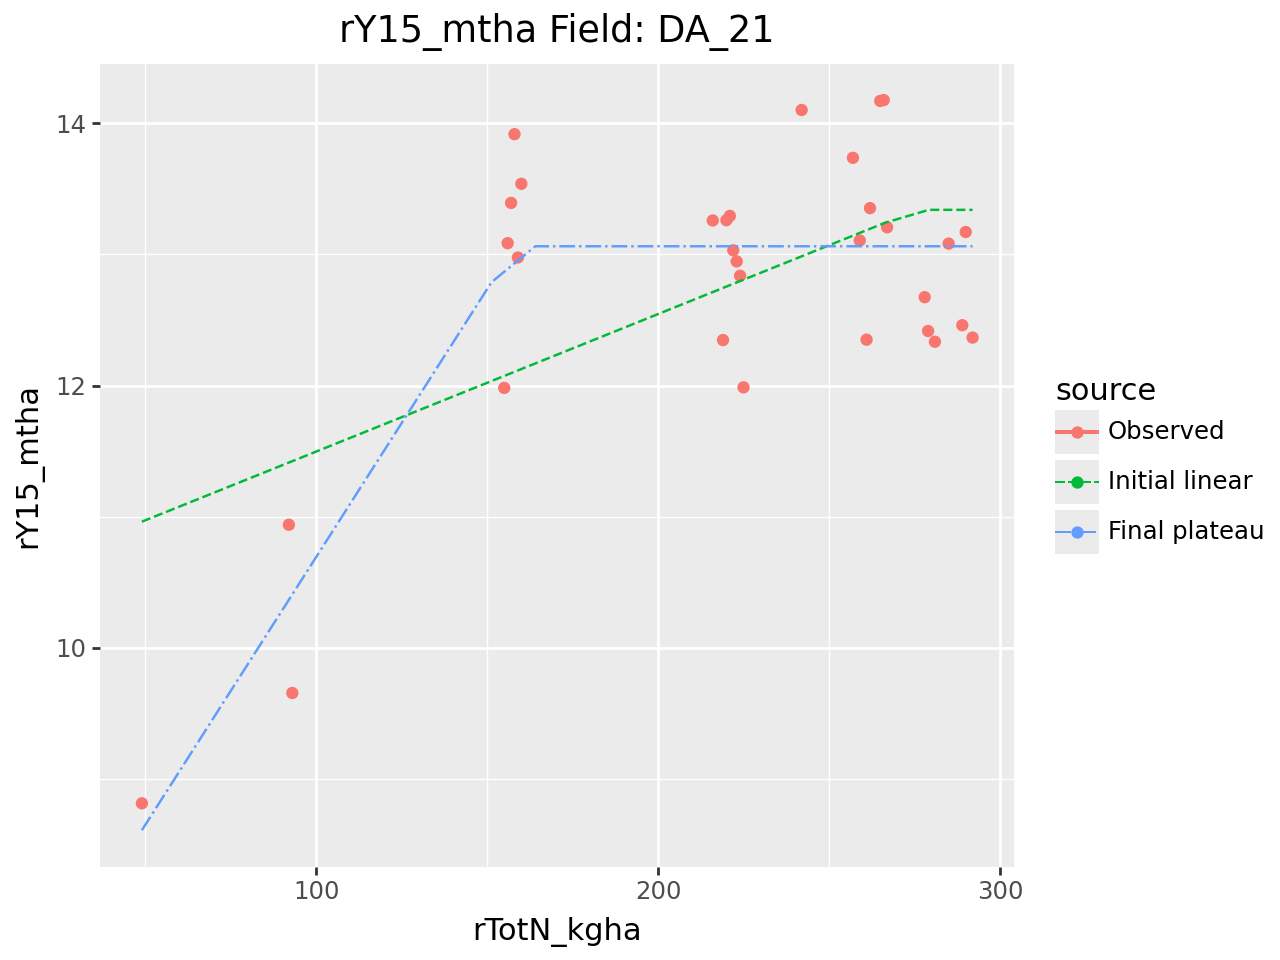

{'b0': np.float64(6.6066529159249665), 'b1': np.float64(0.04086018746256375), 'x_break': np.float64(158.00000277410126), 'y_plateau': np.float64(13.062562648360338), 'r2': np.float64(0.7264624837663677), 'rmse': np.float64(0.5972280331895108), 'aic': np.float64(-26.98920149619775)}


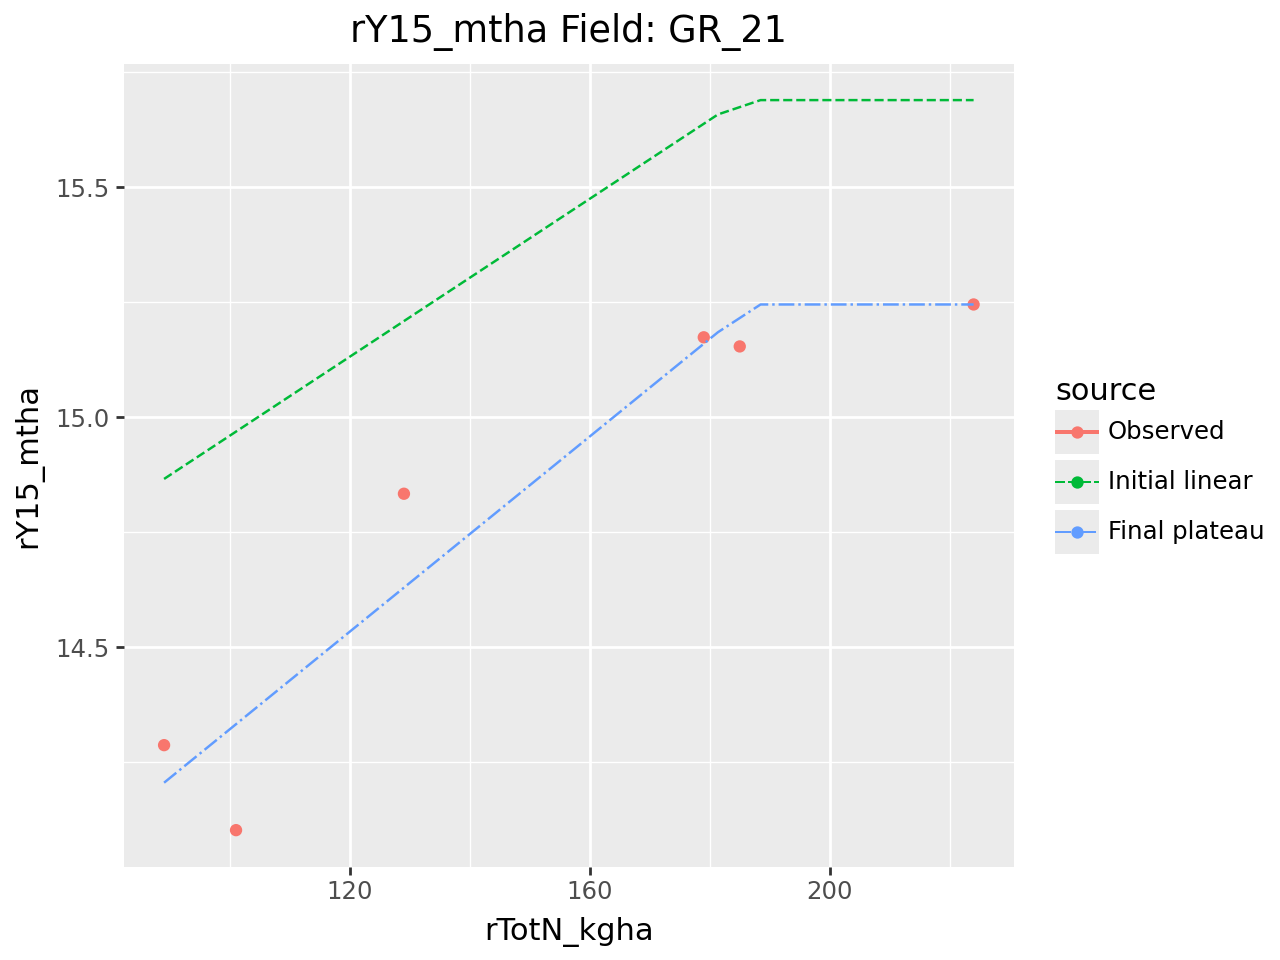

{'b0': np.float64(13.26192467579386), 'b1': np.float64(0.010604155964117757), 'x_break': np.float64(187.0548512740818), 'y_plateau': np.float64(15.245483492549075), 'r2': np.float64(0.9123523045676402), 'rmse': np.float64(0.13318799821794713), 'aic': np.float64(-18.191923540851302)}


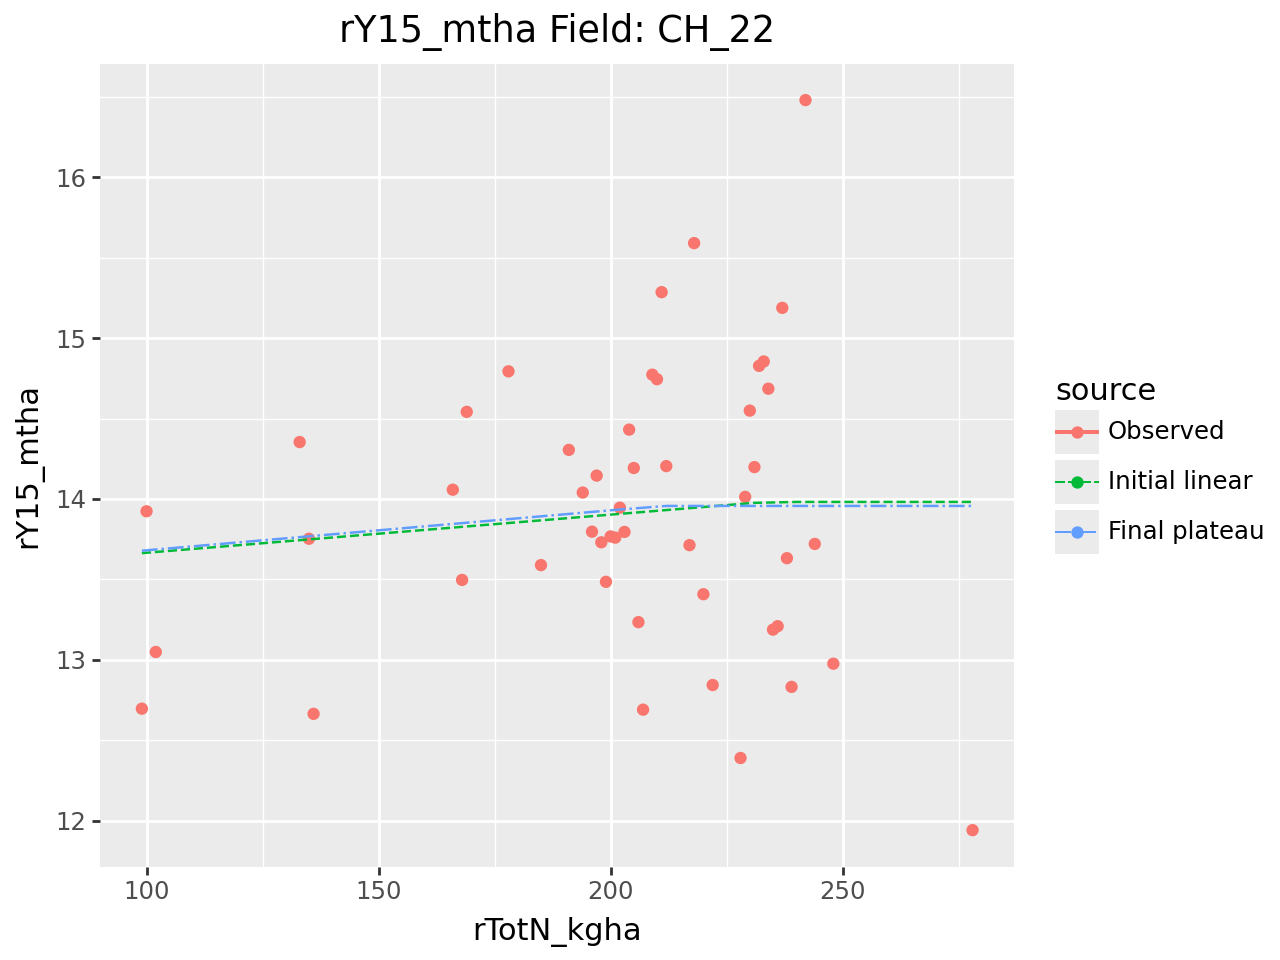

{'b0': np.float64(13.43290548870201), 'b1': np.float64(0.0024831439216905986), 'x_break': np.float64(211.00011123855128), 'y_plateau': np.float64(13.956849132400059), 'r2': np.float64(0.02764532348972293), 'rmse': np.float64(0.8489582413668904), 'aic': np.float64(-10.0470373958604)}


/workspace/workflow/_9GTDpreparation/fit_curves.py:72: OptimizeWarning: Covariance of the parameters could not be estimated
/workspace/workflow/_9GTDpreparation/fit_curves.py:86: UserWarning: x_break (287.39) outside observed range.


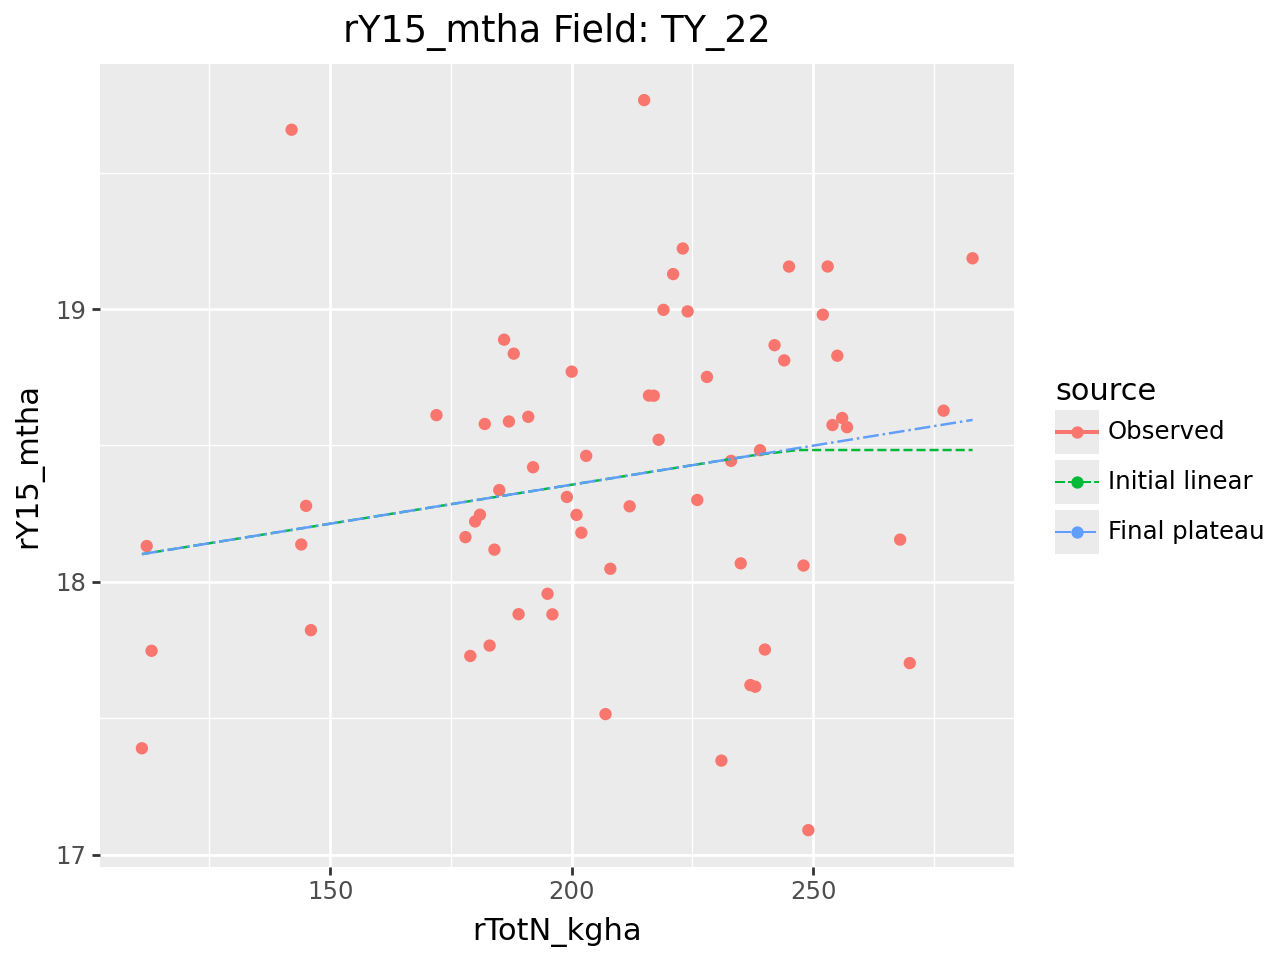

{'b0': np.float64(17.783706829516472), 'b1': np.float64(0.0028615285761023398), 'x_break': np.float64(287.39163961545165), 'y_plateau': np.float64(18.606086218808993), 'r2': np.float64(0.042232845590026824), 'rmse': np.float64(0.5356053634977923), 'aic': np.float64(-73.91777935569844)}


/workspace/workflow/_9GTDpreparation/fit_curves.py:72: OptimizeWarning: Covariance of the parameters could not be estimated
/workspace/workflow/_9GTDpreparation/fit_curves.py:86: UserWarning: x_break (439.23) outside observed range.


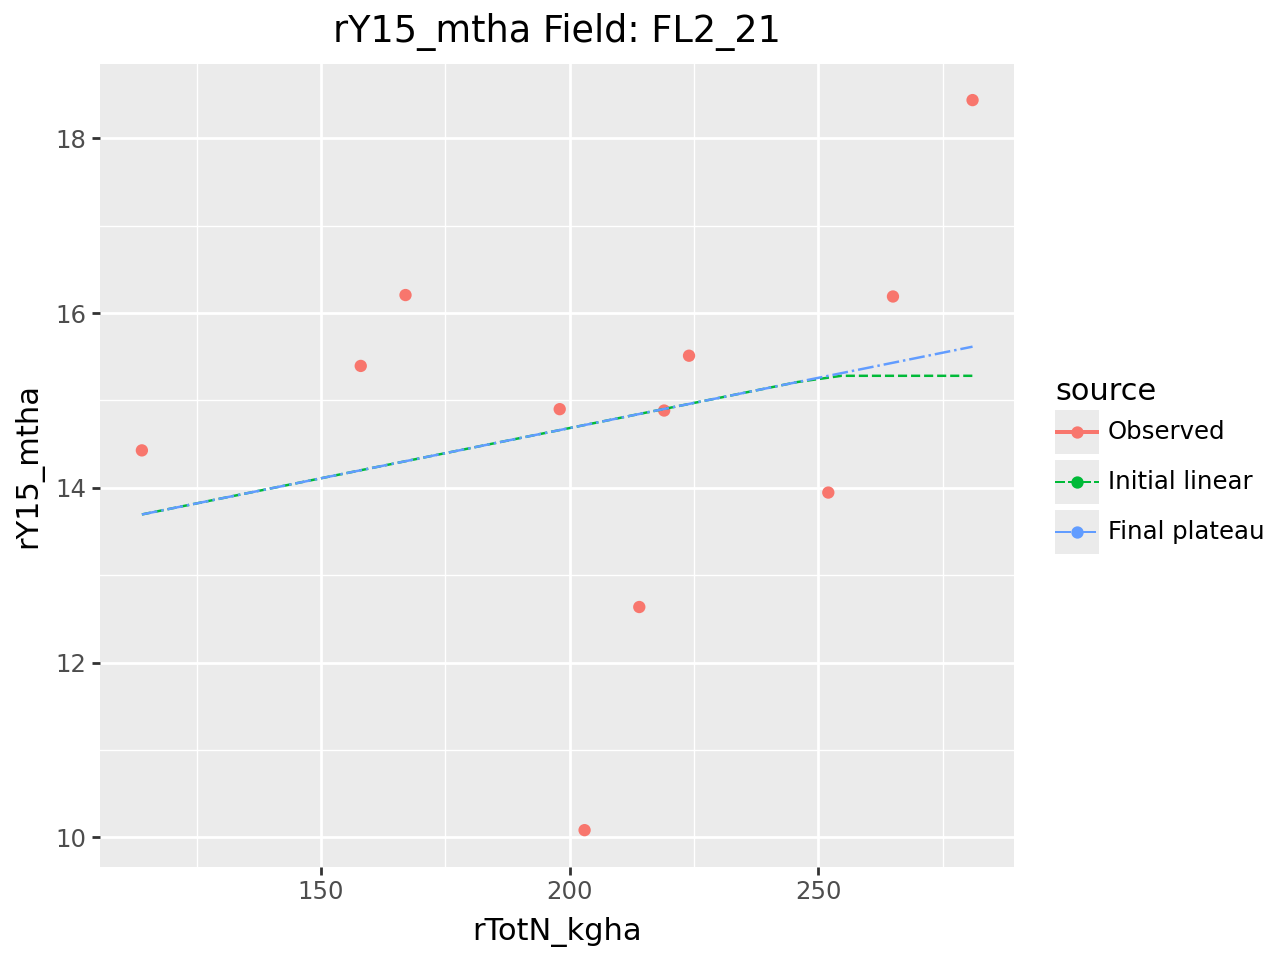

{'b0': np.float64(12.385060230374126), 'b1': np.float64(0.011498265125756791), 'x_break': np.float64(439.22901888276084), 'y_plateau': np.float64(17.435431940414148), 'r2': np.float64(0.06943190536432065), 'rmse': np.float64(1.9688807101718757), 'aic': np.float64(20.904234704835922)}


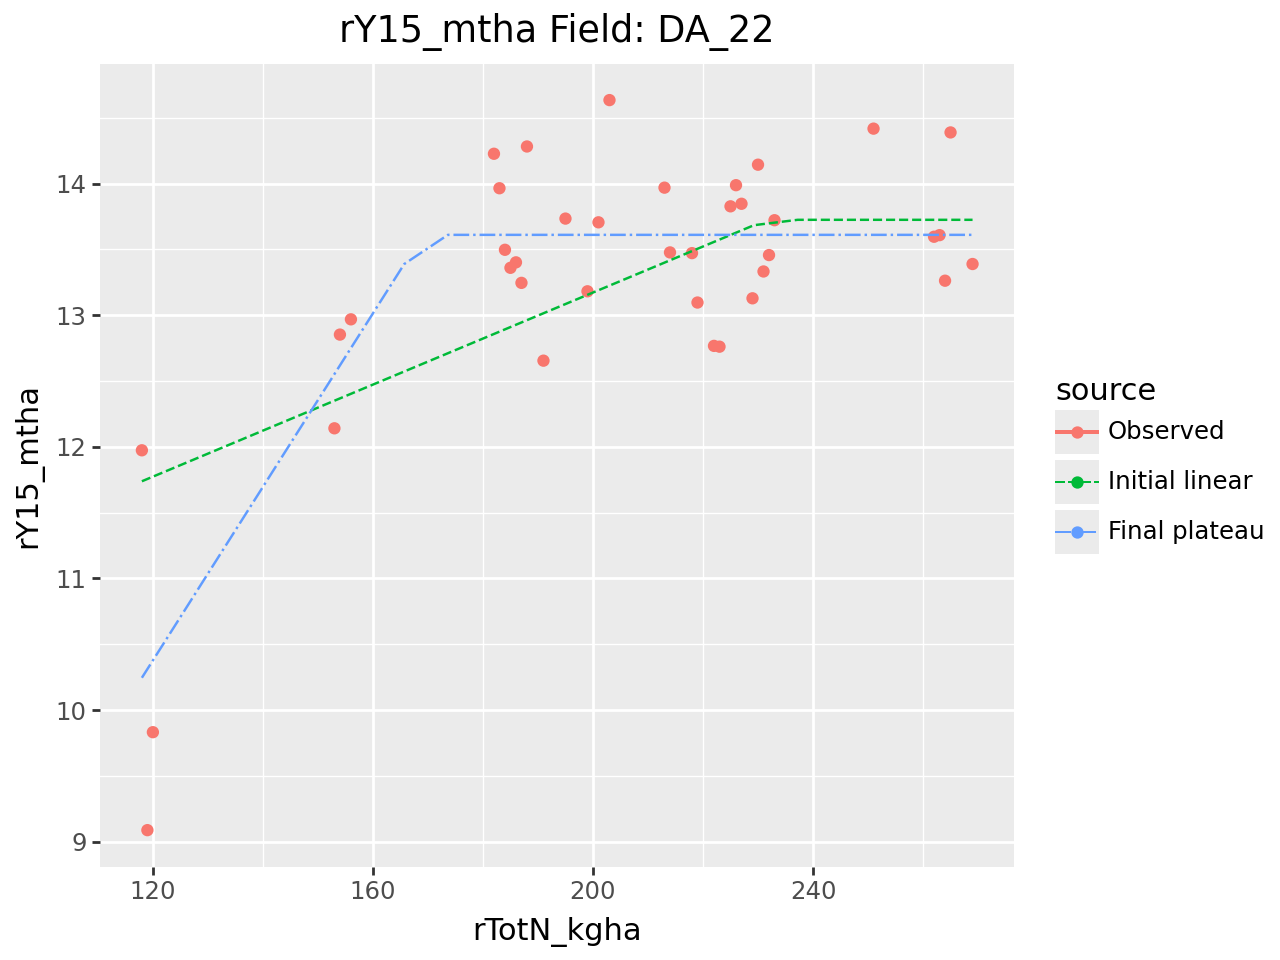

{'b0': np.float64(2.4691208650147063), 'b1': np.float64(0.06590472411067316), 'x_break': np.float64(169.04911758335984), 'y_plateau': np.float64(13.610256320498785), 'r2': np.float64(0.7122877014671745), 'rmse': np.float64(0.5756613402135642), 'aic': np.float64(-35.969916408366004)}


/workspace/workflow/_9GTDpreparation/fit_curves.py:72: OptimizeWarning: Covariance of the parameters could not be estimated
/workspace/workflow/_9GTDpreparation/fit_curves.py:86: UserWarning: x_break (305.62) outside observed range.


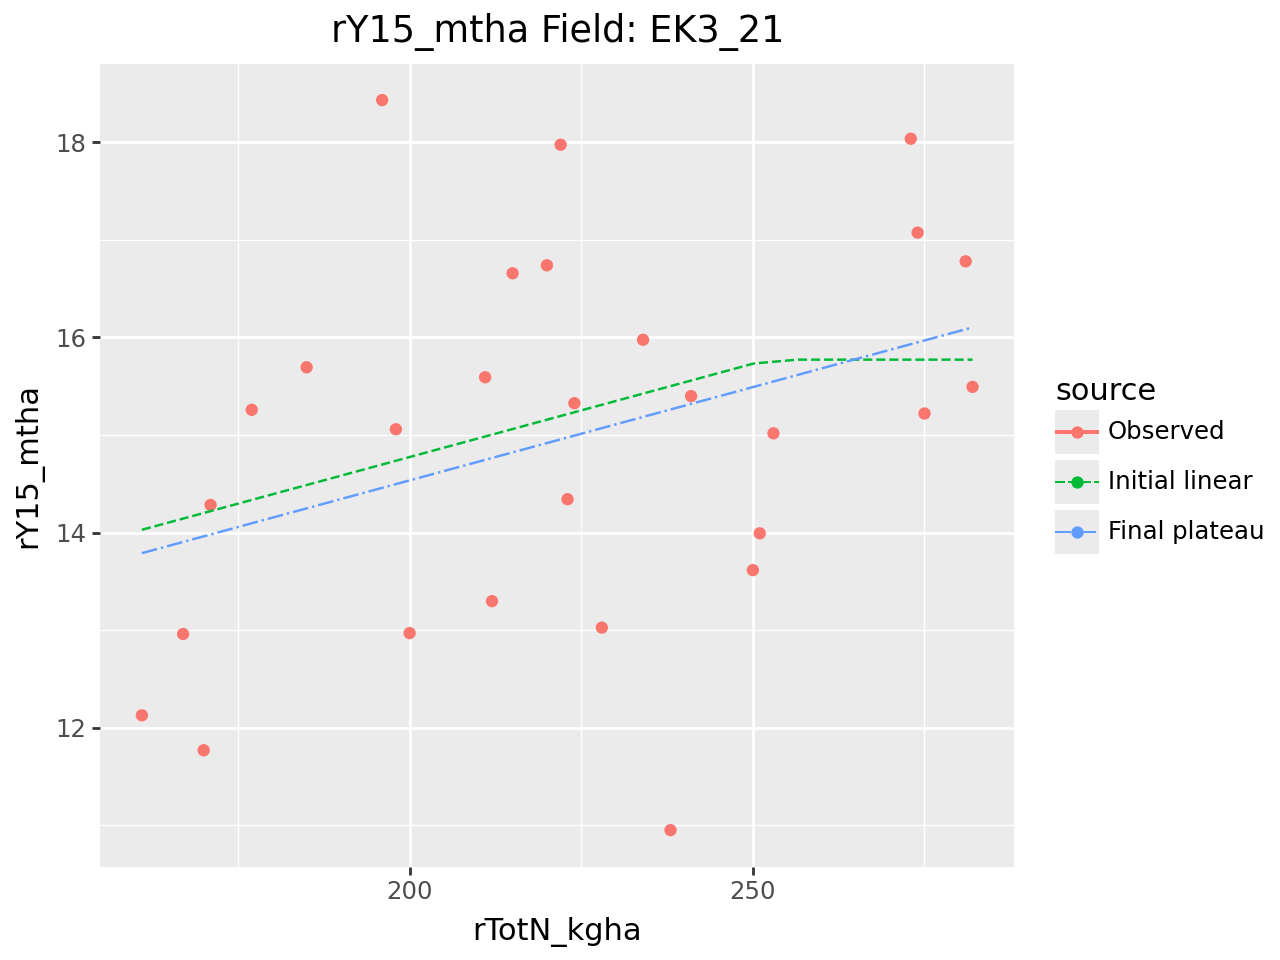

{'b0': np.float64(10.711512041953913), 'b1': np.float64(0.01911486530915679), 'x_break': np.float64(305.62250894348364), 'y_plateau': np.float64(16.55344513585517), 'r2': np.float64(0.13234553649886238), 'rmse': np.float64(1.7556431066463833), 'aic': np.float64(37.518773010351936)}


In [ ]:
warnings.filterwarnings('ignore', category=PlotnineWarning)

gtd2 = pd.read_excel('/workspace/workflow/_9GTDpreparation/NRCS_N_project_Indiana_dataset_2025.04.17_CSV.xlsx',sheet_name='Data',header=3)
# Filtering rows
gtd2=gtd2[gtd2['PreCrop']=='Soybean']
# Selecting Columns 
gtd2=gtd2[['Year','FieldID','rTotN_kgha','rY15_mtha']]

# Here I just rounded the decimals and then I grouped by nrate to avoid repeated nrates
gtd2['rTotN_kgha'] = [int(x) for x in gtd2['rTotN_kgha']]

gtd2 = gtd2.sort_values('rTotN_kgha')
gtd2 = gtd2.groupby(['rTotN_kgha','FieldID'],as_index=False)['rY15_mtha'].mean()

for i in gtd2['FieldID'].unique():
    subdf=gtd2[(gtd2['FieldID']==i)]
    print(fit_linear_plateau(group_df=subdf, y_var='rY15_mtha', x_var="rTotN_kgha", min_points=5))
